In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

cpu


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.RandomHorizontalFlip(p=0.5)
    ])

batch_size = 4
epochs = 30

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(64, 64, 3)
        
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
y_loss = {}  # loss history
y_loss['train'] = []
y_loss['val'] = []
y_acc = {}  # loss history
y_acc['train'] = []
y_acc['val'] = []
x_epoch = []



In [ ]:
import numpy as np

class Convolutional(Layer):
    def __init__(self , input_shape, kernel_size , depth):
        input_depth, input_height, input_width = input_shape 
        self.depth  = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth , input_height - kernel_size + 1, input_width - kernel_size+1)
        self.kernel_shape = (depth, input_depth, kernel_size,kernel_size)
        self.kernel_size = kernel_size
        mean = 0
        stddev = 0.001
        self.kernels = np.random.normal(mean, stddev, self.kernel_shape)
        self.biases = np.random.normal(mean, stddev, self.output_shape)
        self.vdk =  np.zeros(self.kernel_shape)
        self.vdb =  np.zeros(self.output_shape)
        self.sdk =  np.zeros(self.kernel_shape)
        self.sdb = np.zeros(self.output_shape)
        self.b1 = 0.9
        self.b2 = 0.999
        self.epsilon = 1e-8 
        self.time_fw = 0 
        self.time_bw = 0 
        self.input_height = input_height
        self.input_width = input_width



    def forward(self, input):
        t1 = time.time()
        self.input = input 
        self.output = np.copy(self.biases)
#         for i in range(self.depth):
#             for j in range(self.input_depth):
        intermediate = mycorrel(self.input.reshape(1, self.input_height ,self.input_width,self.input_depth ) , self.kernels.reshape(self.kernel_size, self.kernel_size , self.input_depth,self.depth))
        #intermediate of shape -> 1,d,h,w
        intermediate =  np.squeeze(intermediate).reshape(self.output_shape)
        self.time_fw += time.time() - t1
        return self.output +intermediate
    
    def backward(self, output_gradient, learning_rate):
        t1 = time.time()
        kernel_gradient = np.zeros(self.kernel_shape)
        input_gradient = np.zeros(self.input_shape)
        
#         kernel_gradient[i,j] = signal.correlate2d(self.input[j] , output_gradient[i],"valid")
        intermediate = mycorrel(self.input.reshape(1, self.input_height ,self.input_width,self.input_depth ), output_gradient.reshape(output_gradient.shape[2],output_gradient.shape[3],output_gradient.shape[1],output_gradient.shape[0])

        kernel_gradient =  np.squeeze(intermediate).reshape(self.kernel_shape)
        
        for i in range(self.depth):
            for j in range(self.input_depth):
                input_gradient[j] += signal.convolve2d(output_gradient[i] , self.kernels[i,j] ,'full')
        self.vdk =self.b1*self.vdk + (1-self.b1)*kernel_gradient 
        self.vdb =self.b1*self.vdb + (1-self.b1)*output_gradient 

        self.sdk =self.b2*self.sdk + (1-self.b2)* np.square(kernel_gradient)
        self.sdb =self.b2*self.sdb + (1-self.b2)* np.square(output_gradient)

        self.kernels -= learning_rate*(self.vdk/np.sqrt(self.sdk + self.epsilon))
        self.biases -= learning_rate*(self.vdb/np.sqrt(self.sdb + self.epsilon))
        self.time_bw += time.time() - t1 
        return input_gradient
    



In [6]:
total = 0 
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    total_loss = 0.0
    count = 0 
    correct_pred = 0 
    correct_pred_val = 0 
    total_pred = 0 
    total_pred_val = 0 
    
    for i, data in enumerate(trainloader, 0):
        
        count += 1
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device) , data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred += 1
            total_pred += 1
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    

        curloss = loss.item()
        running_loss += curloss
        total_loss += curloss
        if i % 2000 == 1999:    # print every 2000 mini-batches
            total += 1 
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
            
            with torch.no_grad():
                correct = 0
                loss_val = 0.0
                countval = 0
                for data_val in testloader:
                    countval += 1
                    inputs_val, labels_val = data_val[0].to(device) , data_val[1].to(device)
                    # calculate outputs by running images through the network
                    outputs_val = net(inputs_val)
                    
                    # the class with the highest energy is what we choose as prediction
                    _, predicted = torch.max(outputs_val.data, 1)
                    for label, prediction in zip(labels_val, predicted):
                        if label == prediction:
                            correct_pred_val += 1
                        total_pred_val += 1
                    loss = criterion(outputs_val, labels_val)
                    loss_val += loss.item()
                    if countval == 2000:
                        break
            loss_val /= countval
            y_loss['val'].append(loss_val)
            y_loss['train'].append(total_loss/count)
            y_acc['train'].append(correct_pred / total_pred )
            y_acc['val'].append(correct_pred_val/total_pred_val)
            
    x_epoch.append(total)
    # since we're not training, we don't need to calculate the gradients for our outputs
    
    
print('Finished Training')

[1,  2000] loss: 2.302
[1,  4000] loss: 2.300
[1,  6000] loss: 2.279
[1,  8000] loss: 2.240
[1, 10000] loss: 2.188
[1, 12000] loss: 2.163
[2,  2000] loss: 2.150
[2,  4000] loss: 2.127
[2,  6000] loss: 2.108
[3,  2000] loss: 2.058
[3,  4000] loss: 2.057
[3,  6000] loss: 2.043
[3,  8000] loss: 2.032
[3, 10000] loss: 2.038
[3, 12000] loss: 2.009
[4,  2000] loss: 2.016
[4,  4000] loss: 2.008
[4,  6000] loss: 1.995
[4,  8000] loss: 1.997
[4, 10000] loss: 1.987
[4, 12000] loss: 1.986
[5,  2000] loss: 1.977
[5,  4000] loss: 1.967
[5,  6000] loss: 1.970
[5,  8000] loss: 1.955
[5, 10000] loss: 1.952
[5, 12000] loss: 1.964
[6,  2000] loss: 1.943
[6,  4000] loss: 1.941
[6,  6000] loss: 1.936
[6,  8000] loss: 1.945
[6, 10000] loss: 1.937
[6, 12000] loss: 1.942
[7,  2000] loss: 1.930
[7,  4000] loss: 1.921
[7,  6000] loss: 1.918
[7,  8000] loss: 1.911
[7, 10000] loss: 1.922
[7, 12000] loss: 1.923
[8,  2000] loss: 1.913
[8,  4000] loss: 1.896
[8,  6000] loss: 1.906
[8,  8000] loss: 1.910
[8, 10000] 

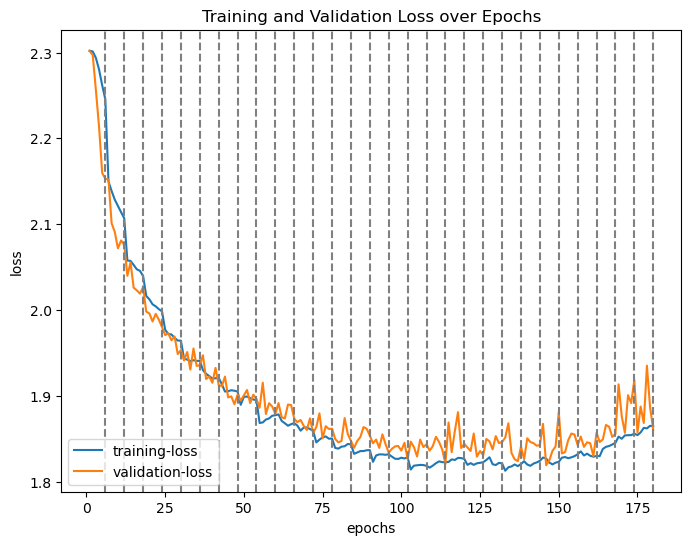

In [7]:
import matplotlib.pyplot as plt

# Define your data
x = [i for i in range(1,total+1)]

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data on the axis
ax.plot(x, y_loss['train'] , label='training-loss')
ax.plot(x, y_loss['val'] , label='validation-loss')

for i in x_epoch:
    ax.axvline(i, color='gray', linestyle='--')

ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_title('Training and Validation Loss over Epochs')

# Show the graph
plt.show()


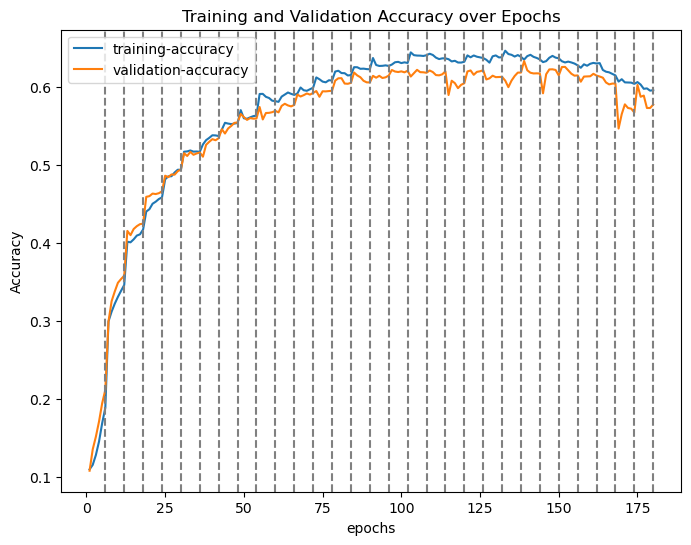

In [8]:
import matplotlib.pyplot as plt

# Define your data
x = [i for i in range(1,total+1)]


# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data on the axis
ax.plot(x, y_acc['train'] , label='training-accuracy')
ax.plot(x, y_acc['val'] , label='validation-accuracy')

for i in x_epoch:
    ax.axvline(i, color='gray', linestyle='--')

ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy over Epochs')
# Show the graph
plt.show()


In [9]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data_check in testloader:
        inputs_val, labels_val = data_check[0].to(device) , data_check[1].to(device)
        
        outputs = net(inputs_val)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels_val, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
            

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 69.0 %
Accuracy for class: car   is 73.4 %
Accuracy for class: bird  is 0.0 %
Accuracy for class: cat   is 57.9 %
Accuracy for class: deer  is 64.0 %
Accuracy for class: dog   is 32.9 %
Accuracy for class: frog  is 86.1 %
Accuracy for class: horse is 66.7 %
Accuracy for class: ship  is 82.4 %
Accuracy for class: truck is 61.1 %


citation : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html (mentioned in the assignment)